In [18]:
import matplotlib.pyplot as plt
from mesa import find_read_profile, read_history, read_profile
import astropy.units as u
import numpy as np
import astropy.constants as const
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scienceplots
import pandas as pd

plt.style.use(['science','ieee'])

In [21]:
def get_data(carpet_path):


    profiles_paths = []

    for root, dirs, files in os.walk(carpet_path):
        for file in files:
            if file.endswith(".data") and file.startswith("profile"):
                profiles_paths.append(os.path.join(root, file))



    profiles_paths.sort(key=lambda x: int(x.split("profile")[1].split(".")[0]))

    eps_nuc = []
    pp = []
    cno = []
    tri_alfa = []
    eps_neu = []
    age = []
    non_nuc_neu = []
    mass = []

    for path in profiles_paths:
        profile = read_profile(path, as_table=True)
        eps_nuc.append(profile["eps_nuc"][0])
        pp.append(profile["pp"][0])
        cno.append(profile["cno"][0])
        tri_alfa.append(profile["tri_alfa"][0])
        non_nuc_neu.append(profile["non_nuc_neu"][0])
        eps_neu.append(profile["eps_nuc_neu_total"][0])
        age.append(profile.meta['star_age'])
        mass = profile.meta['star_mass']
        
    return pd.DataFrame({"eps_nuc": eps_nuc, "pp": pp, "cno": cno, "tri_alfa": tri_alfa, "non_nuc_neu": non_nuc_neu, "eps_neu": eps_neu, "age": age, "mass": mass})

In [22]:
mass_8_data = get_data("8_solar_mass")
mass_1425_data = get_data("1.425_solar_mass")

# 1A

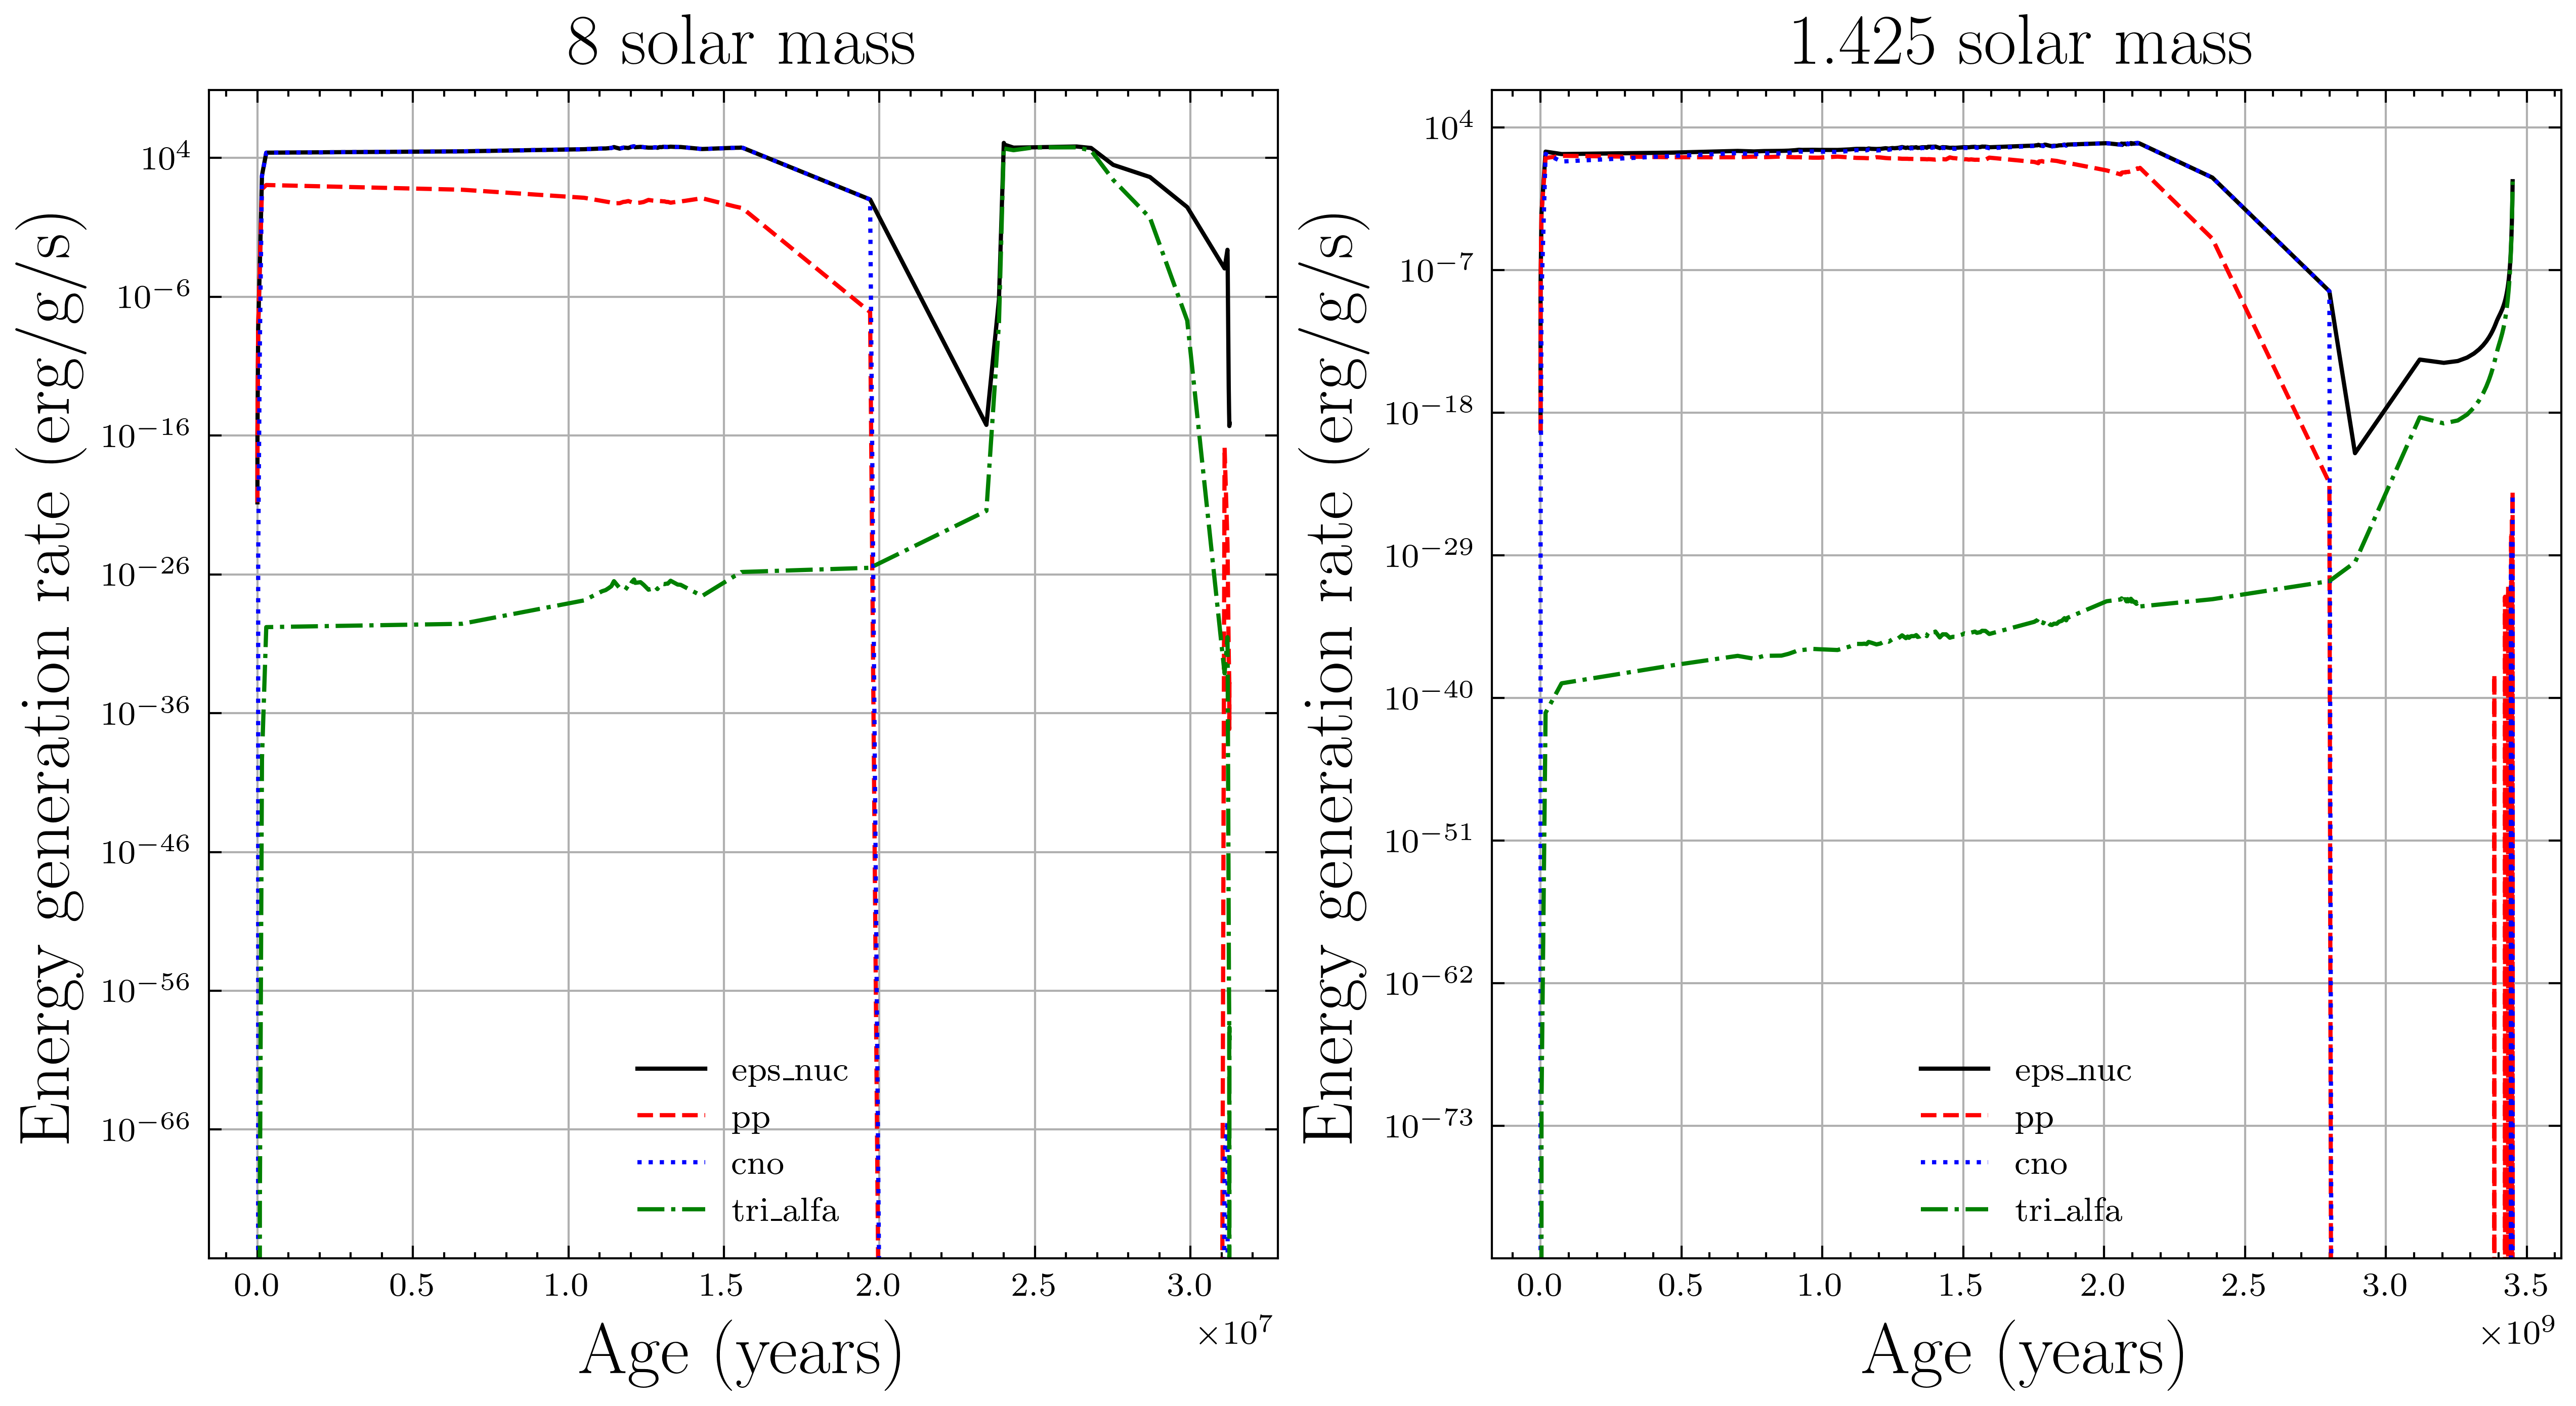

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(mass_8_data['age'], mass_8_data['eps_nuc'], label="eps_nuc")
ax[0].plot(mass_8_data['age'], mass_8_data['pp'], label="pp")
ax[0].plot(mass_8_data['age'], mass_8_data['cno'], label="cno")
ax[0].plot(mass_8_data['age'], mass_8_data['tri_alfa'], label="tri_alfa")

ax[0].set_xlabel("Age (years)", fontsize=17)
ax[0].set_ylabel("Energy generation rate (erg/g/s)", fontsize=17)
ax[0].set_title("8 solar mass", fontsize=17)
ax[0].legend()
ax[0].grid()
ax[0].set_yscale("log")

ax[1].plot(mass_1425_data['age'], mass_1425_data['eps_nuc'], label="eps_nuc")
ax[1].plot(mass_1425_data['age'], mass_1425_data['pp'], label="pp")
ax[1].plot(mass_1425_data['age'], mass_1425_data['cno'], label="cno")
ax[1].plot(mass_1425_data['age'], mass_1425_data['tri_alfa'], label="tri_alfa")

ax[1].set_xlabel("Age (years)", fontsize=17)
ax[1].set_ylabel("Energy generation rate (erg/g/s)", fontsize=17)
ax[1].set_title("1.425 solar mass", fontsize=17)
ax[1].legend()
ax[1].grid()
ax[1].set_yscale("log")

plt.show()



# 1B

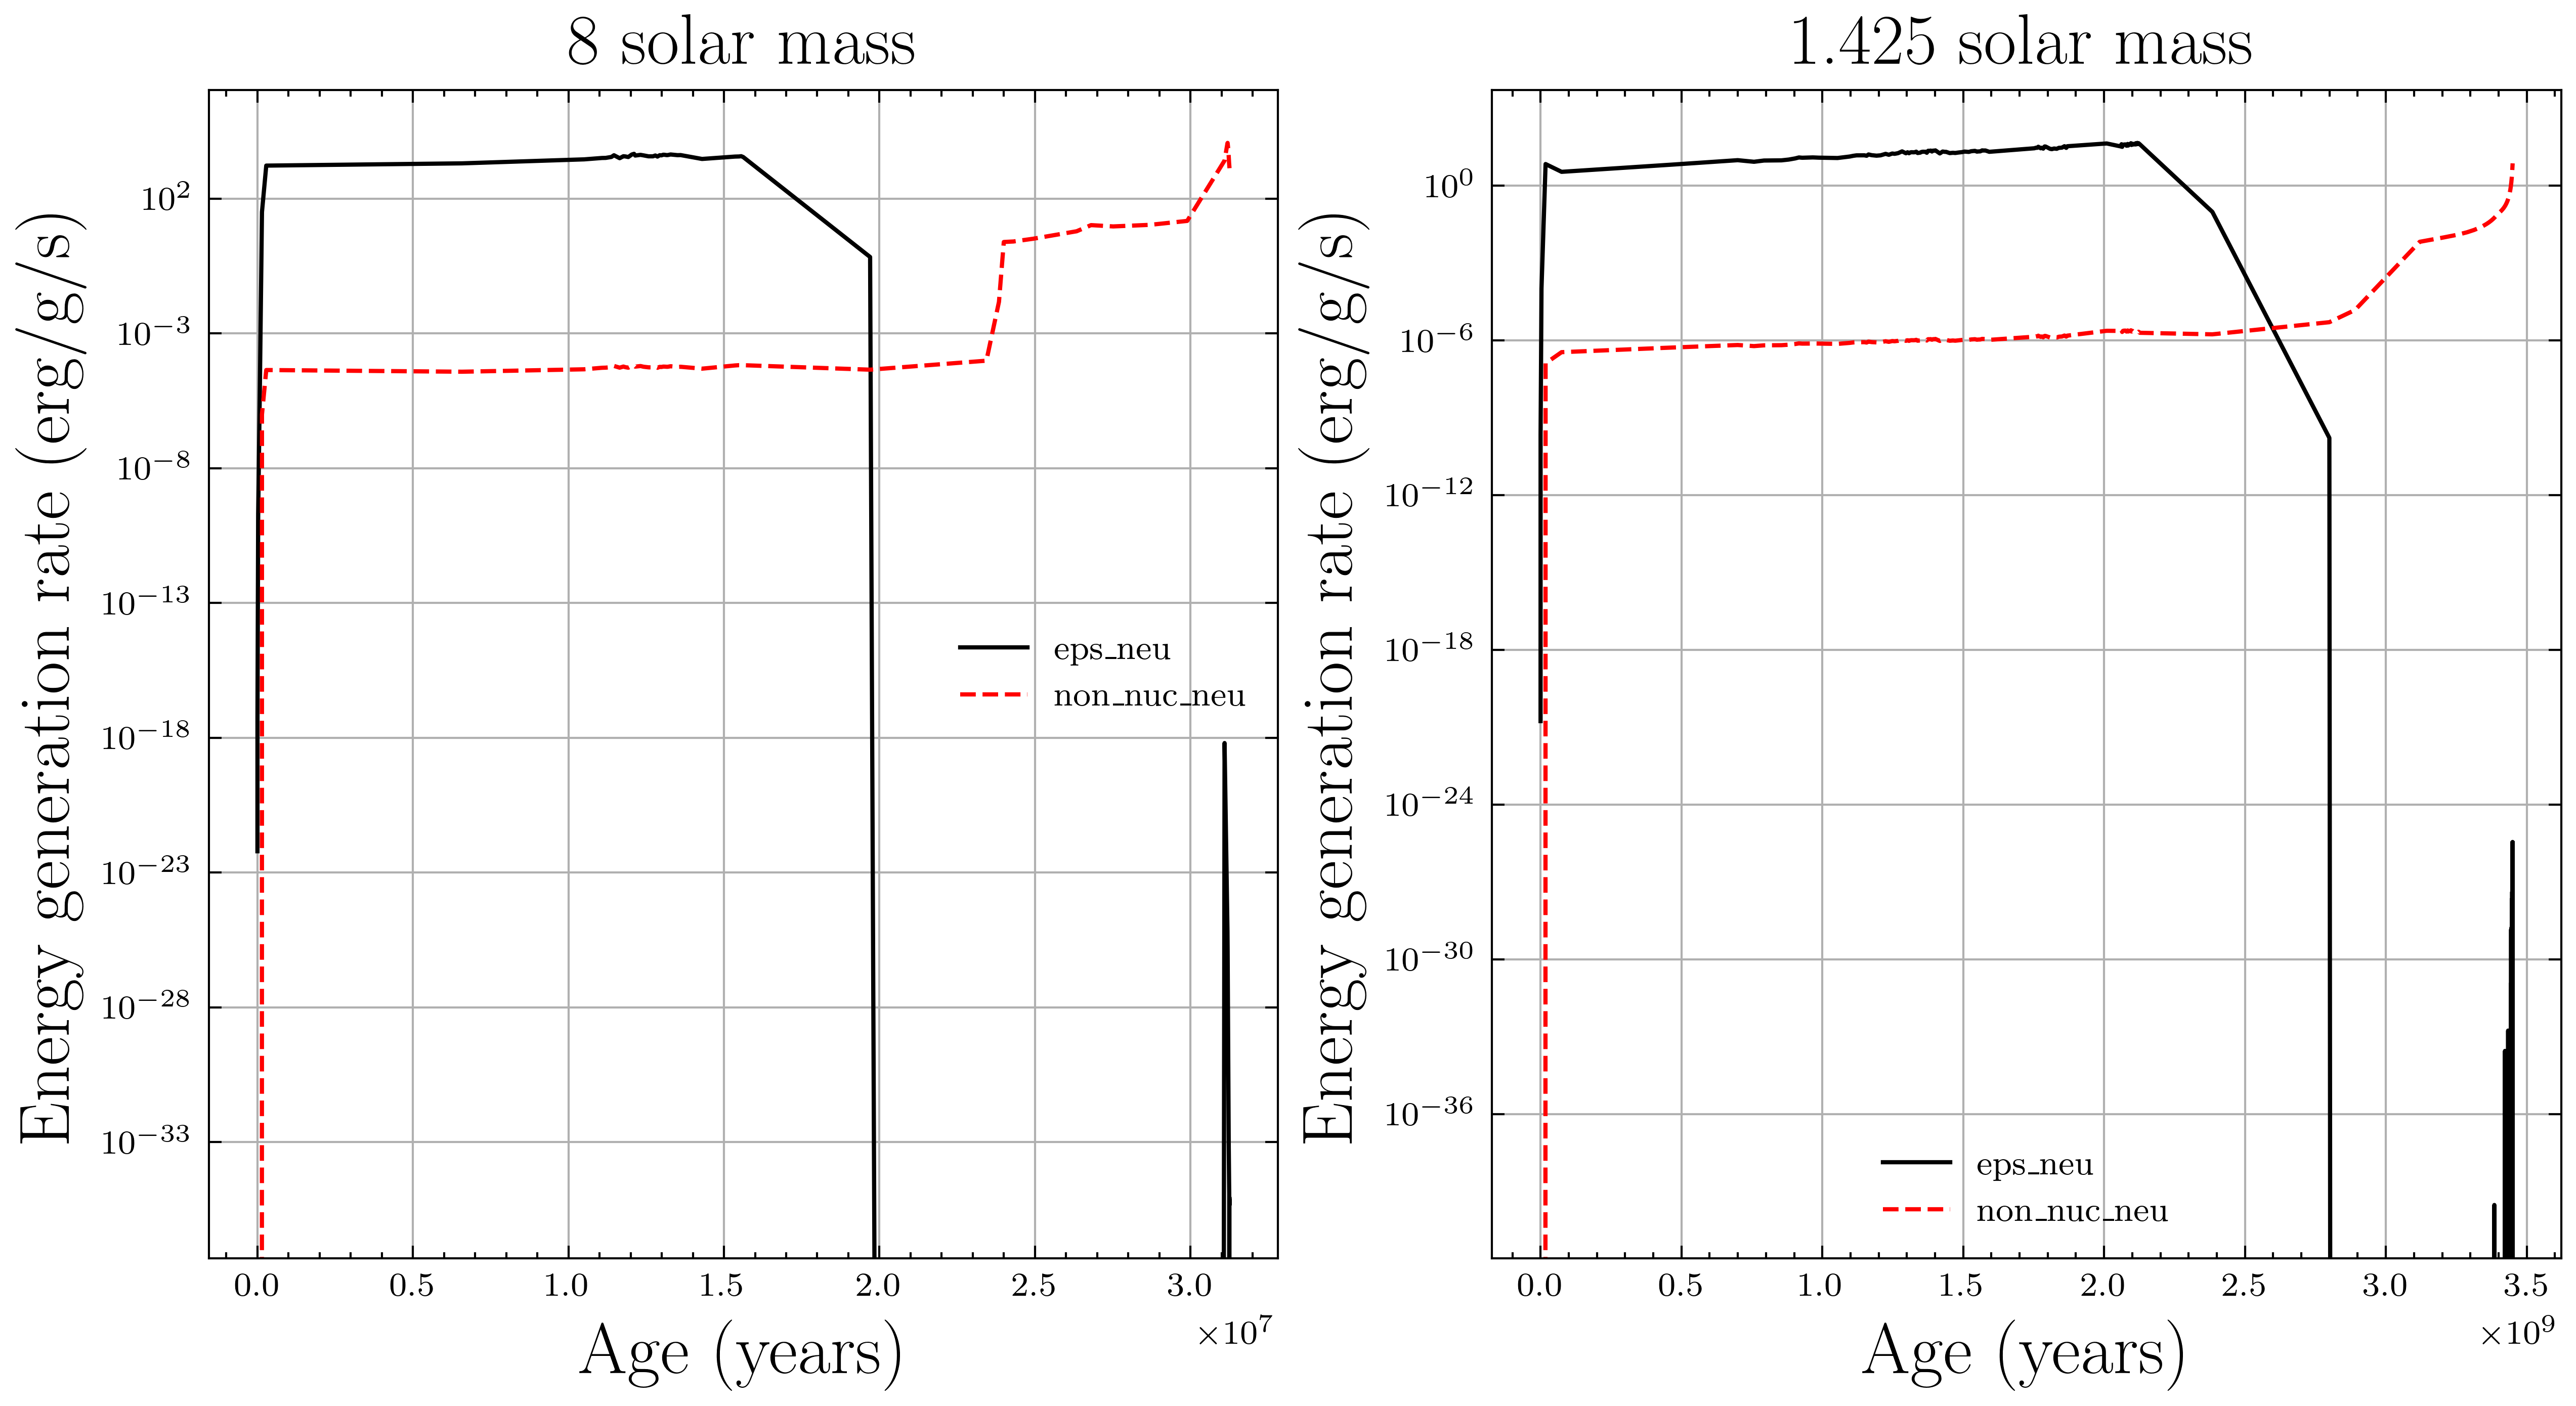

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(mass_8_data['age'], mass_8_data['eps_neu'], label="eps_neu")
ax[0].plot(mass_8_data['age'], mass_8_data['non_nuc_neu'], label="non_nuc_neu")

ax[0].set_xlabel("Age (years)", fontsize=17)
ax[0].set_ylabel("Energy generation rate (erg/g/s)", fontsize=17)
ax[0].set_title("8 solar mass", fontsize=17)
ax[0].legend()
ax[0].grid()
ax[0].set_yscale("log")

ax[1].plot(mass_1425_data['age'], mass_1425_data['eps_neu'], label="eps_neu")
ax[1].plot(mass_1425_data['age'], mass_1425_data['non_nuc_neu'], label="non_nuc_neu")

ax[1].set_yscale("log")
ax[1].set_xlabel("Age (years)", fontsize=17)
ax[1].set_ylabel("Energy generation rate (erg/g/s)", fontsize=17)
ax[1].set_title("1.425 solar mass", fontsize=17)
ax[1].legend()
ax[1].grid()

plt.show()

# 2 C

In [98]:
mass8_history = read_history("8_solar_mass/trimmed_history.data", as_table=True)
mass1425_history = read_history("1.425_solar_mass/trimmed_history.data", as_table=True)

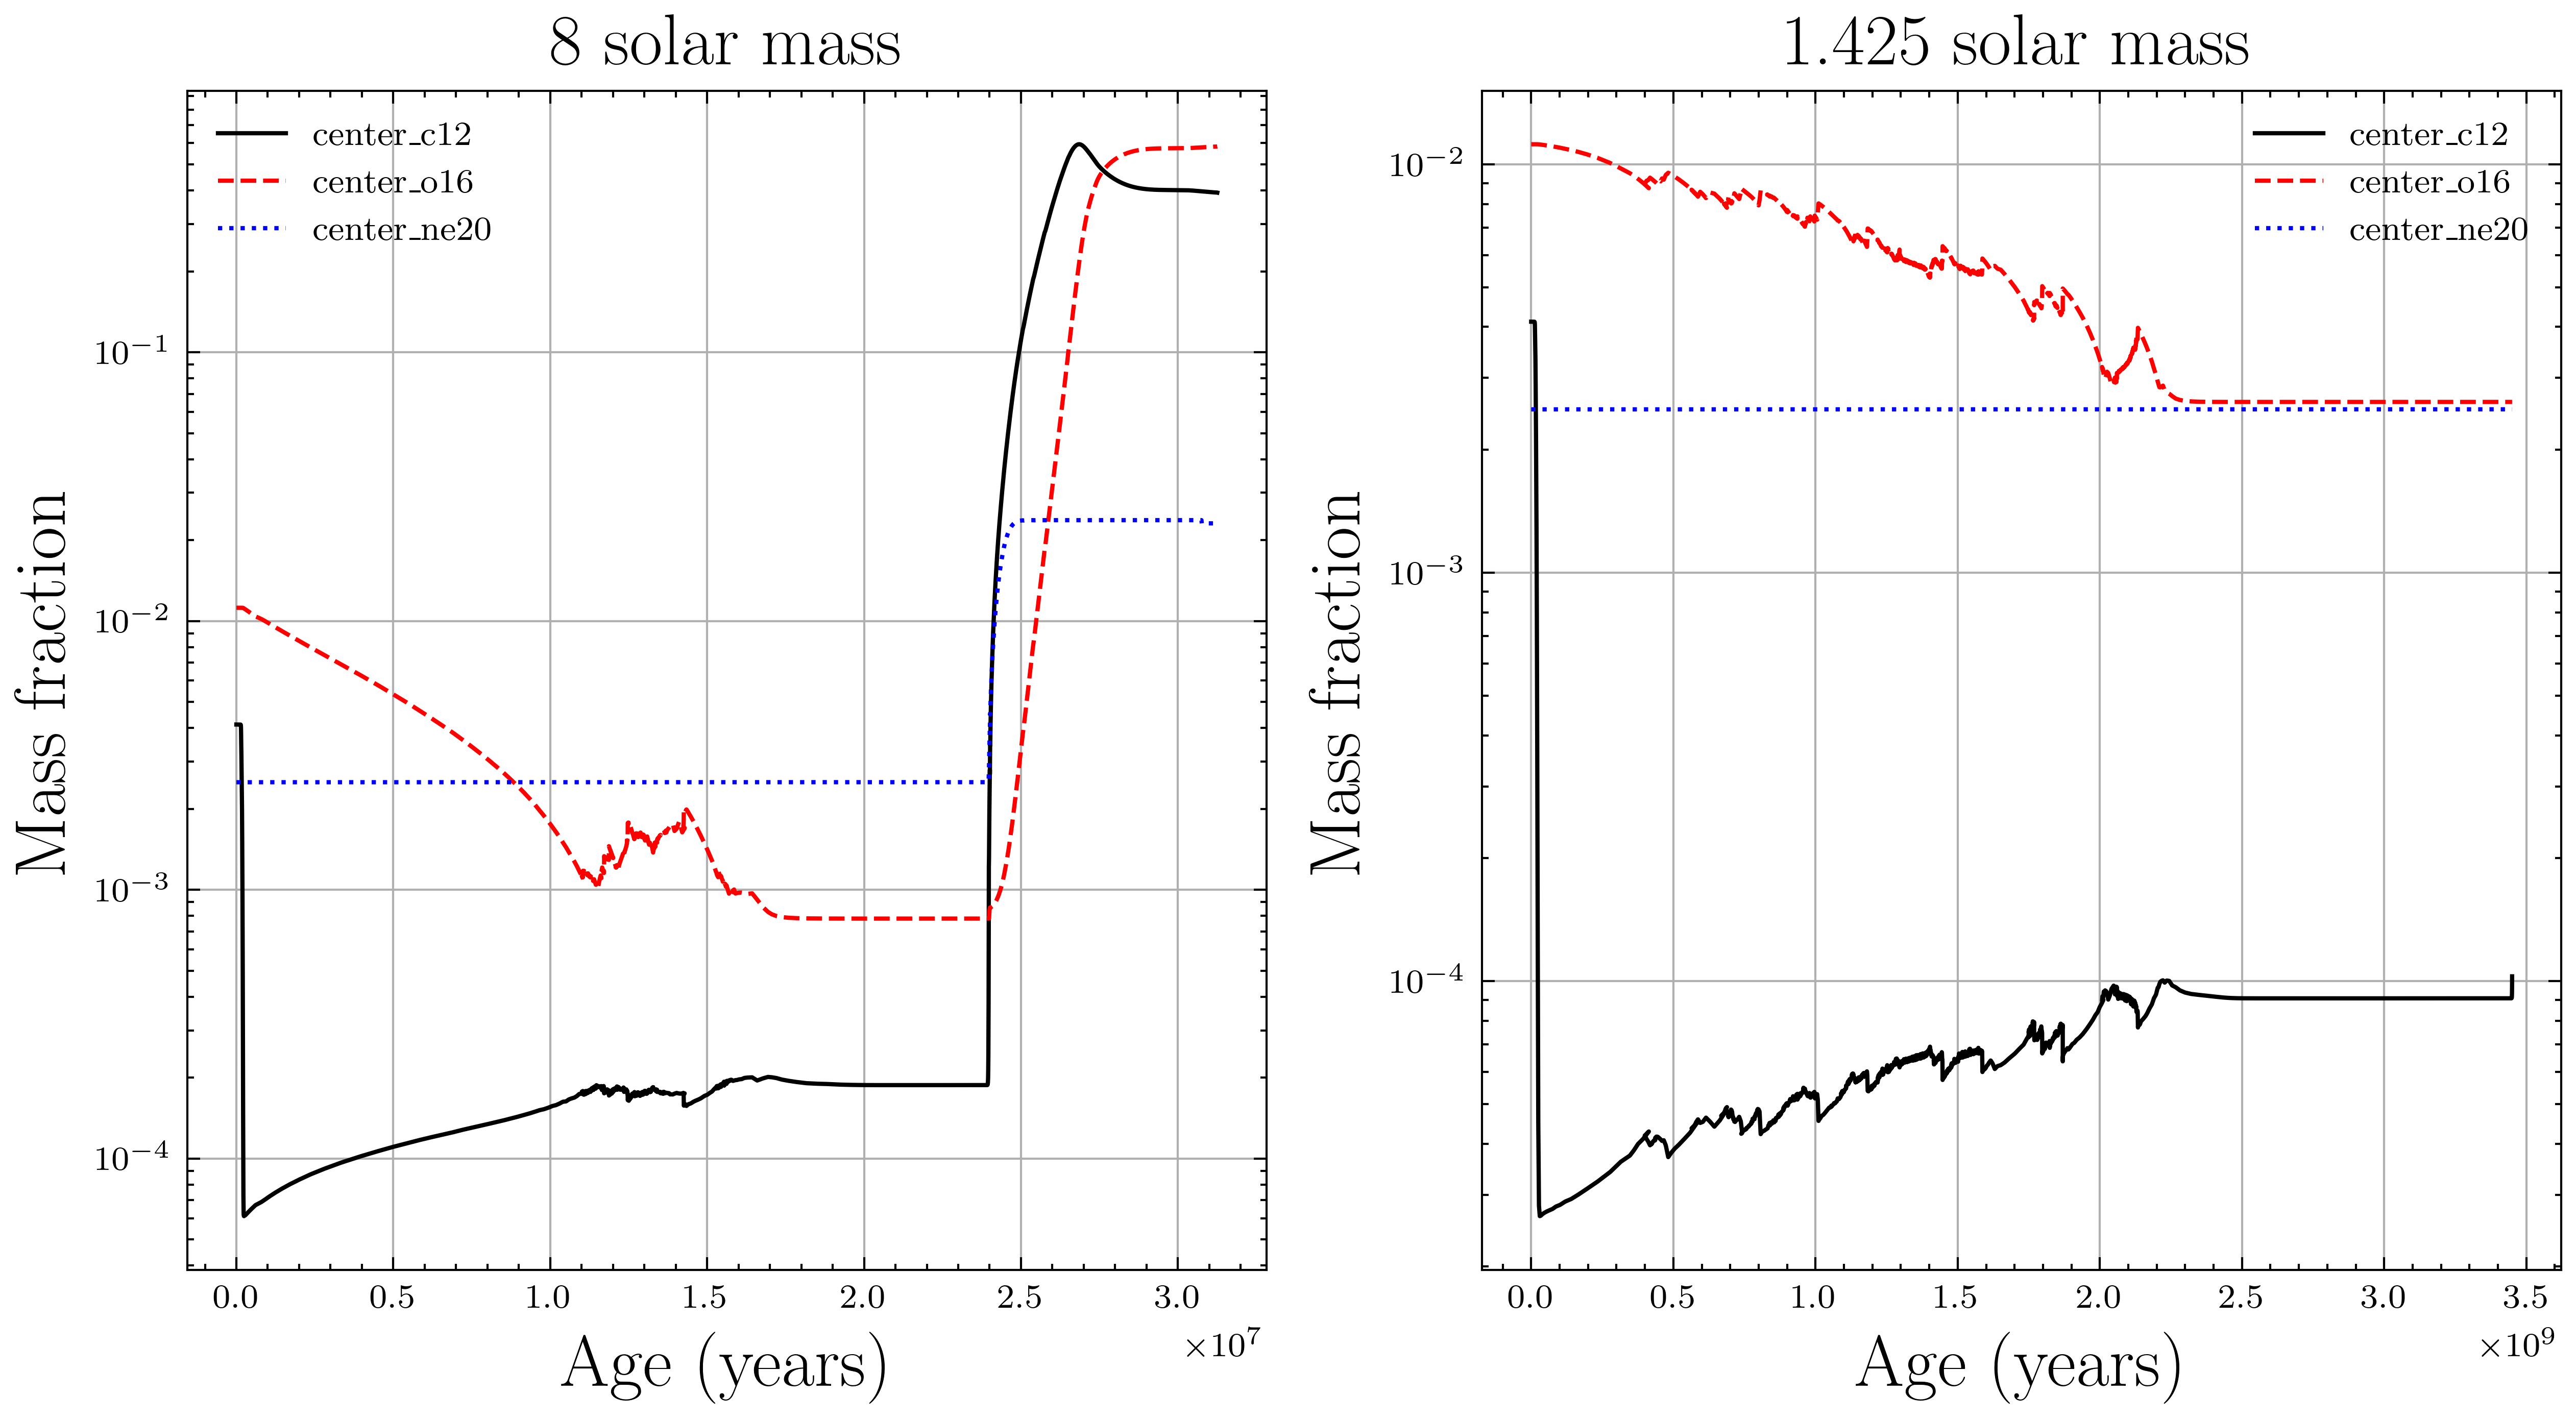

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(mass8_history['star_age'], mass8_history['center_c12'], label="center_c12")
ax[0].plot(mass8_history['star_age'], mass8_history['center_o16'], label="center_o16")
ax[0].plot(mass8_history['star_age'], mass8_history['center_ne20'], label="center_ne20")

ax[0].set_yscale("log")
ax[0].set_xlabel("Age (years)", fontsize=17)
ax[0].set_ylabel("Mass fraction", fontsize=17)
ax[0].set_title("8 solar mass", fontsize=17)
ax[0].legend()
ax[0].grid()

ax[1].plot(mass1425_history['star_age'], mass1425_history['center_c12'], label="center_c12")
ax[1].plot(mass1425_history['star_age'], mass1425_history['center_o16'], label="center_o16")
ax[1].plot(mass1425_history['star_age'], mass1425_history['center_ne20'], label="center_ne20")

ax[1].set_yscale("log")
ax[1].set_xlabel("Age (years)", fontsize=17)
ax[1].set_ylabel("Mass fraction", fontsize=17)
ax[1].set_title("1.425 solar mass", fontsize=17)
ax[1].legend()
ax[1].grid()

plt.show()

In [35]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("8 solar mass", "1.425 solar mass"))

fig.add_trace(go.Scatter(x=mass8_history['log_Teff'], y=mass8_history['log_L'], mode='markers', name='8 solar mass'), row=1, col=1)
fig.add_trace(go.Scatter(x=mass1425_history['log_Teff'], y=mass1425_history['log_L'], mode='markers', name='1.425 solar mass'), row=1, col=2)

fig.update_xaxes(title_text="log(Teff)", row=1, col=1)
fig.update_xaxes(title_text="log(Teff)", row=1, col=2)
fig.update_yaxes(title_text="log(L)", row=1, col=1)
fig.update_yaxes(title_text="log(L)", row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="HR diagram")
fig.update_xaxes(autorange="reversed")

fig.show()

# 2 A

In [2]:
# Masas en unidades de masa atómica unificada (uma)
masa_proton = 1.007825  # Masa del protón (H)
masa_deuterio = 2.014102  # Masa del deuterio (D)
masa_helio3 = 3.016029  # Masa del helio-3 (He3)
masa_helio4 = 4.002603  # Masa del helio-4 (He4)

# Conversión de uma a MeV/c^2
uma_a_MeV = 931.5  # 1 uma ≈ 931.5 MeV/c^2

# Cálculo de Q para cada paso
# Paso 1: H + H -> D + e+ + νe
Q1 = ((2 * masa_proton) - masa_deuterio) * uma_a_MeV

# Paso 2: D + H -> He3 + γ
Q2 = ((masa_deuterio + masa_proton) - masa_helio3) * uma_a_MeV

# Paso 3: He3 + He3 -> He4 + 2H
Q3 = ((2 * masa_helio3) - (masa_helio4 + 2 * masa_proton)) * uma_a_MeV

Q1+Q2 +Q3


19.79530650000033

# 2 B

In [3]:

energia_neutrino = 0.26 

Q_total_PP1 = (Q1 - energia_neutrino) + Q2 + Q3
Q_total_PP1


19.535306500000328

In [4]:
# Conversión de masas de micro-uma a uma
masa_be7 = 7.02971227  # Masa del Be7
masa_li7 = 7.016003434  # Masa del Li7
masa_b8 = 8.0246073  # Masa del B8
masa_be8 = 8.0197266  # Masa del Be8

# Paso 1: He3 + He4 -> Be7 + γ
Q_PP2_1 = ((masa_helio3 + masa_helio4) - masa_be7) * uma_a_MeV

# Paso 2: Be7 + e- -> Li7 + νe
Q_PP2_2 = (masa_be7 - masa_li7) * uma_a_MeV

# Paso 3: Li7 + H -> 2He4
Q_PP2_3 = ((masa_li7 + masa_proton) - (2 * masa_helio4)) * uma_a_MeV

Q_total_PP2 = Q_PP2_1 + Q_PP2_2 + Q_PP2_3

# Paso 1: He3 + He4 -> Be7 + γ (mismo que PP II)
Q_PP3_1 = Q_PP2_1

# Paso 2: Be7 + H -> B8 + γ
Q_PP3_2 = ((masa_be7 + masa_proton) - masa_b8) * uma_a_MeV

# Paso 3: B8 -> Be8 + e+ + νe
Q_PP3_3 = (masa_b8 - masa_be8) * uma_a_MeV

# Paso 4: Be8 -> 2He4
Q_PP3_4 = (masa_be8 - (2 * masa_helio4)) * uma_a_MeV

# Suma de Q para la Cadena PP III
Q_total_PP3 = Q_PP3_1 + Q_PP3_2 + Q_PP3_3 + Q_PP3_4

Q_total_PP2, Q_total_PP3


(19.795306500001157, 19.79530650000033)

In [21]:
Q_total_PP2 - Q_total_PP3


8.277822871605167e-13

# 2 C

In [22]:
numero_de_Avogadro = 6.022e23  # Número de Avogadro

Q_reaccion = 1.442  # MeV

masa_molar_H2 = 2 * 1.00794  # g/mol

# Energía liberada por gramo para la reacción de H + H -> D + e+ + νe
E_por_gramo = (Q_reaccion * numero_de_Avogadro) / masa_molar_H2
E_por_gramo


4.307659186062662e+23

In [29]:
masa_molar_D = 2.014  # g/mol para el deuterio
masa_molar_He3 = 3.016  # g/mol para el helio-3

Q2_reaccion = 5.494  # MeV para la segunda reacción
Q3_reaccion = 12.859  # MeV para la tercera reacción

# Energía liberada por gramo para la segunda reacción D + H -> He3 + γ
E_por_gramo_Q2 = (Q2_reaccion * numero_de_Avogadro) / (masa_molar_D + masa_molar_H2)

# Energía liberada por gramo para la tercera reacción He3 + He3 -> He4 + 2H
E_por_gramo_Q3 = (Q3_reaccion * numero_de_Avogadro) / (2 * masa_molar_He3)

# Energía total liberada por gramo para la cadena PP1
E_total_por_gramo_PP1 = E_por_gramo + E_por_gramo_Q2 + E_por_gramo_Q3

E_total_por_gramo_PP1


2.535523034345264e+24

In [28]:
Q_triple_alpha = 7.275  # Valor de Q para la reacción triple-alfa en MeV
Q_C12_alpha_O16 = 4.96  # Valor de Q para la reacción de C12 con He en MeV

# Masa molar del helio-4 (alpha particle), carbono-12 y del oxígeno-16 en g/mol
masa_molar_He = 4.002602  # Masa molar de He
masa_molar_C12 = 12.0107  # Masa molar de C12
masa_molar_O16 = 15.999  # Masa molar de O16

# Número de Avogadro
N_A = 6.022e23

E_por_gramo_triple_alpha = (Q_triple_alpha * N_A) / (3 * masa_molar_He)

E_por_gramo_C12_alpha_O16 = (Q_C12_alpha_O16 * N_A) / (masa_molar_C12 + masa_molar_He)

E_por_gramo_triple_alpha, E_por_gramo_C12_alpha_O16


(3.6484641740547774e+23, 1.8652692617674982e+23)

# 2 E

In [35]:
L_sol = 3.828e26 
M_sol = 1.989e30 
c = 3.00e8       
conversion_factor = 0.007 

# Estrella de 0.072 M⊙
M_0_072 = 0.072 * M_sol 
L_0_072 = 10**(-4.3) * L_sol

E_0_072 = conversion_factor * M_0_072 * c**2 

t_vida_0_072 = E_0_072 / L_0_072 


M_85 = 85 * M_sol 
L_85 = 10**(6.006) * L_sol 
percentage_mass_fusion = 0.1 


E_85 = conversion_factor * percentage_mass_fusion * M_85 * c**2  # Energía en Joules

t_vida_85 = E_85 / L_85  

seconds_in_year = 365.25 * 24 * 3600

t_vida_0_072_years = t_vida_0_072 / seconds_in_year
t_vida_85_years = t_vida_85 / seconds_in_year

print(f"El tiempo de vida de la estrella de 0.072 M⊙ es {t_vida_0_072_years:.2e} años")
print(f"El tiempo de vida de la estrella de 85 M⊙ es {t_vida_85_years:.2e} años")


El tiempo de vida de la estrella de 0.072 M⊙ es 1.49e+14 años
El tiempo de vida de la estrella de 85 M⊙ es 8.70e+05 años


In [47]:
from scipy.optimize import minimize_scalar

In [74]:
T = 1.5e7 
k = 8.617333262145e-5 
b = 26.73  # Valor de b en keV^2, valor para reacciones p-p (use uno de wik aquí porq el que calculé yo ajustaba peor uwu)
E0 = 86

In [91]:

def F_exact(E):
    return np.sqrt(b / E + E / (k * T))

def F_approx(E):
    F0 = F_exact(E0)
    F0_second_derivative = -0.5 * b / E0**2.5 + 1 / (2 * k * T)
    return F0 + 0.5 * F0_second_derivative * (E - E0)**2

E_values = np.linspace(1, 300, 100)  # en keV

F_exact_values = F_exact(E_values)
F_approx_values = F_approx(E_values)
exp_F_exact_values = np.exp(-F_exact_values)
exp_F_approx_values = np.exp(-F_approx_values)

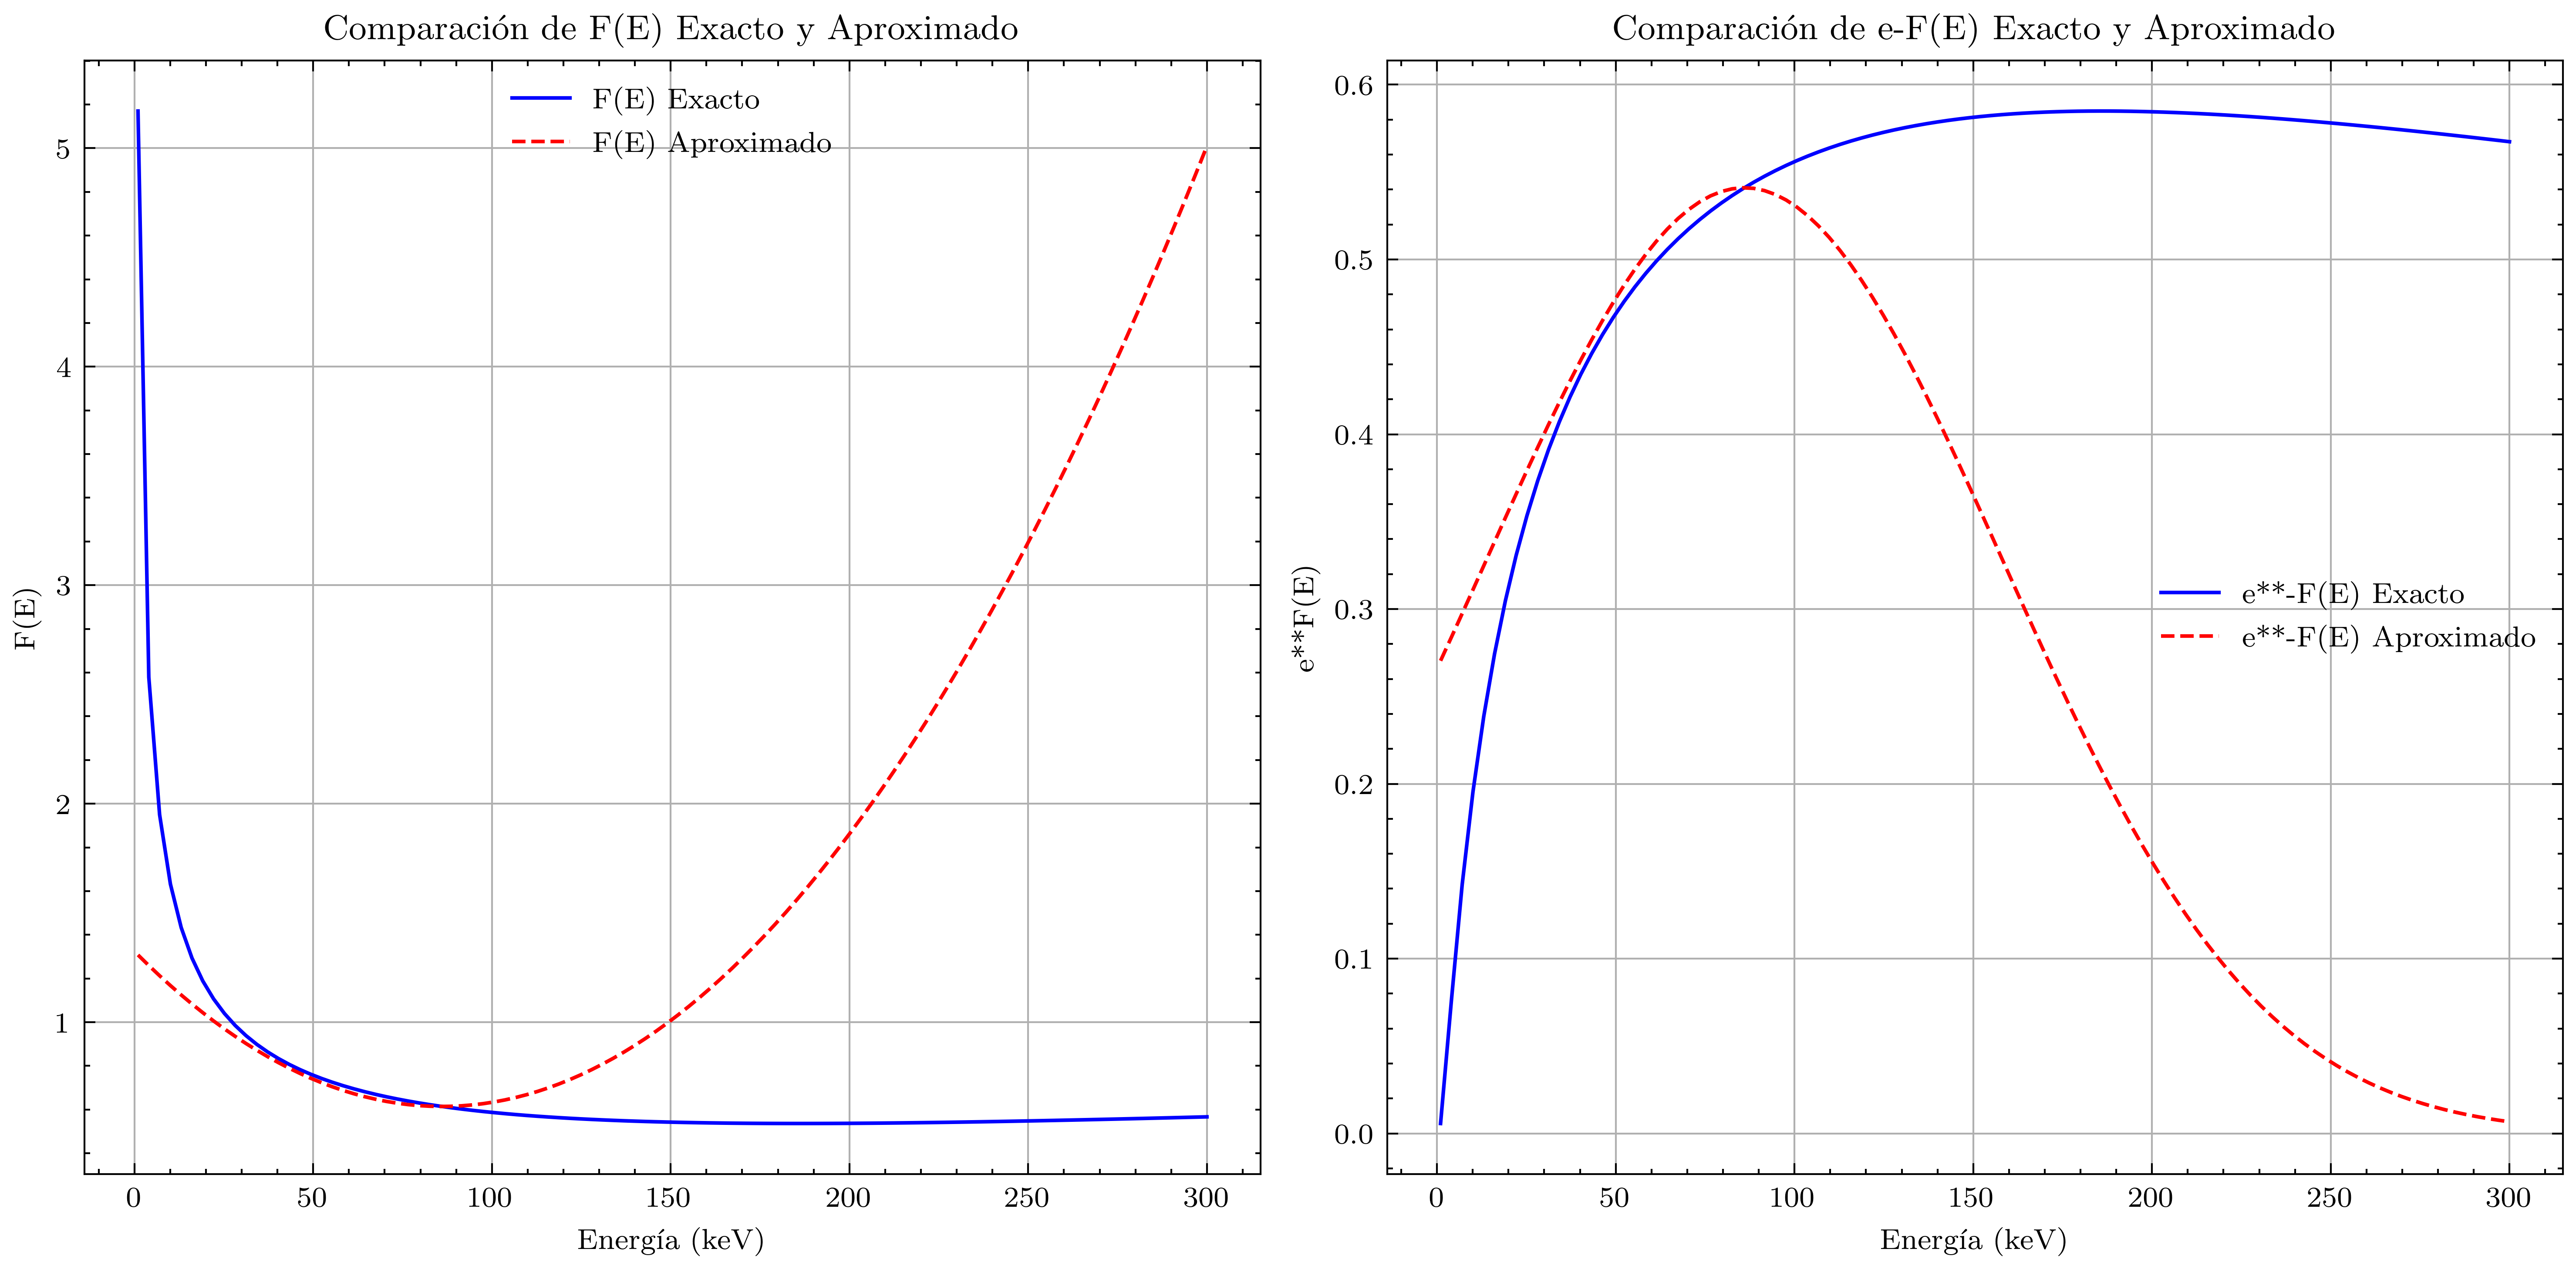

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(E_values, F_exact_values, label='F(E) Exacto', color='blue')
ax[0].plot(E_values, F_approx_values, label='F(E) Aproximado', linestyle='dashed', color='red')
ax[0].set_xlabel('Energía (keV)')
ax[0].set_ylabel('F(E)')
ax[0].set_title('Comparación de F(E) Exacto y Aproximado')
ax[0].legend()
ax[0].grid()

ax[1].plot(E_values, exp_F_exact_values, label='e**-F(E) Exacto', color='blue')
ax[1].plot(E_values, exp_F_approx_values, label='e**-F(E) Aproximado', linestyle='dashed', color='red')
ax[1].set_xlabel('Energía (keV)')
ax[1].set_ylabel('e**F(E)')
ax[1].set_title('Comparación de e-F(E) Exacto y Aproximado')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()

In [93]:
from scipy.integrate import quad

E_min = 0
E_max = 100

def integrand(E):
    return np.exp(-F_approx(E))

integral_result, integral_error = quad(integrand, E_min, E_max)

integral_result, integral_error


(45.043223809818045, 5.000802417700406e-13)

# 2 F

# 3 A Y B

In [ ]:
from sympy import symbols, exp, integrate, oo

lambda_ = symbols('lambda', real=True, positive=True)
t = symbols('t', real=True)

f_t = lambda_ * exp(-lambda_ * t)

integral_result = integrate(f_t, (t, 0, oo))

print(f'Integral result: {integral_result}')


Integral result: 1


In [ ]:
t_mean = integrate(t * f_t, (t, 0, oo))

print(f'Integral result: {t_mean}')


Integral result: 1/lambda


# 3 D

In [6]:
from sympy import symbols, exp, I, sqrt, integrate, oo, pi, Function

t, λ, ω = symbols('t λ ω', real=True, positive=True)

a_t = sqrt(λ) * exp(-λ * t / 2)

A_ω = sqrt(λ)/(sqrt(2*pi) * (I*ω + λ/2))

A_ω_simplified = A_ω.simplify()
A_ω_simplified / sqrt(2)


sqrt(λ)/(sqrt(pi)*(λ + 2*I*ω))

In [13]:
from sympy import symbols, exp, I, sqrt, integrate, oo, pi

E, E_0 = symbols('E E_0', real=True, positive=True)

I_ω_expression = (A_ω_simplified * A_ω_simplified.conjugate()).simplify()

I_E = I_ω_expression.subs(ω, E - E_0)

I_E_simplified = I_E.simplify()

I_E_simplified

2*λ/(pi*(λ**2 + 4*(E - E_0)**2))

In [14]:
integral_I_E_full_range = integrate(I_E, (E, -oo, oo))

integral_I_E_full_range


1